In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
import pandas as pd
data = pd.read_csv('Boston.csv')


# Display the first few rows of the data to verify it's loaded correctly
print(data.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = data.drop('medv', axis=1)  # Features (all columns except 'medv')
y = data['medv']  # Target variable ('medv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326


In [ ]:

# Make predictions on the test set
y_pred1 = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred1)
r2 = r2_score(y_train, y_pred1)

print(f"train Mean Squared Error: {mse}")
print(f"train R-squared: {r2}")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


train Mean Squared Error: 21.641412753226312
train R-squared: 0.7508856358979673
Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326


In [ ]:
# some over fitting what should i do to avoid it feature reduction , expand feature , regularzation term

In [ ]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
data1 = data.drop(columns=['chas','dis'], axis=1)

In [ ]:
X = data1.drop('medv', axis=1)  # Features (all columns except 'medv')
y = data1['medv']  # Target variable ('medv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred1)
r2 = r2_score(y_train, y_pred1)

print(f"train Mean Squared Error: {mse}")
print(f"train R-squared: {r2}")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

train Mean Squared Error: 24.440896018219554
train R-squared: 0.7186607760274347
Mean Squared Error: 27.78350184609415
R-squared: 0.6211363896861339


In [ ]:
X = data.drop('medv', axis=1)
y = data['medv']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")

print(f"Number of components kept: {pca.n_components_}")


Train Mean Squared Error: 24.499947257185944
Train R-squared: 0.7179810370467918
Test Mean Squared Error: 29.680045643025196
Test R-squared: 0.5952745874553012
Number of components kept: 7


**Expand the features **

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = data.drop('medv', axis=1)

X_poly = poly.fit_transform(X)

y = data['medv']

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")

Train Mean Squared Error: 5.131464044082063
Train R-squared: 0.9409317027113502
Test Mean Squared Error: 14.257338169504829
Test R-squared: 0.805582944789098


Regularization

In [ ]:
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Train Mean Squared Error: {mse_train}")
    print(f"Train R-squared: {r2_train}")
    print(f"Test Mean Squared Error: {mse_test}")
    print(f"Test R-squared: {r2_test}")

# Linear Regression
print("Linear Regression:")
model_lr = LinearRegression()
train_and_evaluate_model(model_lr, X_train, X_test, y_train, y_test)


# Ridge Regression (L2 Regularization)
print("\nRidge Regression (L2):")
model_ridge = Ridge(alpha=1.0) # You can tune the alpha parameter
train_and_evaluate_model(model_ridge, X_train, X_test, y_train, y_test)

# Lasso Regression (L1 Regularization)
print("\nLasso Regression (L1):")
model_lasso = Lasso(alpha=1)
train_and_evaluate_model(model_lasso, X_train, X_test, y_train, y_test)


Linear Regression:
Train Mean Squared Error: 21.641412753226312
Train R-squared: 0.7508856358979673
Test Mean Squared Error: 24.291119474973478
Test R-squared: 0.6687594935356326

Ridge Regression (L2):
Train Mean Squared Error: 21.82411829157586
Train R-squared: 0.7487825119234439
Test Mean Squared Error: 24.477191227708644
Test R-squared: 0.6662221670168523

Lasso Regression (L1):
Train Mean Squared Error: 26.41686667312293
Train R-squared: 0.6959153721670908
Test Mean Squared Error: 24.409489761299707
Test R-squared: 0.6671453631686304


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# prompt: i want to split df to x and y as the label is the last column

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# prompt: before i want to preprocess the data

# Select numerical features to scale (assuming all features except the target are numerical)
# If you have categorical features, you would need to handle them separately (e.g., one-hot encoding)
numerical_features = X_train.columns

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# If you had non-numerical features that weren't scaled, you would concatenate them
# back with the scaled numerical features. In this case, we assume all features are numerical.
# Convert the scaled arrays back to DataFrames with column names if needed for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features)

print("Scaled Training Data:")
print(X_train_scaled_df.head())
print("\nScaled Test Data:")
print(X_test_scaled_df.head())

# Now you can use X_train_scaled_df and X_test_scaled_df for training your models
# For example, training a Linear Regression model on the scaled data:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_df, y_train)

# Make predictions on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled_df)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"\nLinear Regression with Scaled Data:")
print(f"Mean Squared Error: {mse_scaled}")
print(f"R-squared: {r2_scaled}")


Scaled Training Data:
   Unnamed: 0      crim    zn     indus  chas       nox        rm       age  \
0    0.944444  0.168763  0.00  0.642963   0.0  0.471193  0.293065  0.972194   
1    0.027778  0.006950  0.00  0.274074   0.0  0.314815  0.400854  0.552008   
2    0.656746  0.000288  0.35  0.197037   0.0  0.108848  0.440919  0.210093   
3    0.837302  0.079146  0.00  0.642963   0.0  0.471193  0.455562  0.846550   
4    0.035714  0.008056  0.00  0.274074   0.0  0.314815  0.379093  0.685891   

        dis       rad       tax   ptratio     black     lstat  
0  0.088307  1.000000  0.914122  0.808511  0.880428  0.639625  
1  0.306359  0.130435  0.229008  0.893617  0.996772  0.185982  
2  0.501150  0.000000  0.223282  0.457447  0.912628  0.168322  
3  0.081132  1.000000  0.914122  0.808511  0.005547  0.594923  
4  0.242514  0.130435  0.229008  0.893617  0.984997  0.263521  

Scaled Test Data:
   Unnamed: 0      crim   zn     indus  chas       nox        rm       age  \
0    0.341270  0.00093

In [11]:

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer and first hidden layer
model_nn.add(Dense(32, activation='relu')) # Second hidden layer
model_nn.add(Dense(1, activation='linear')) # Output layer for regression


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model_nn.compile(optimizer='adam', loss='mse',metrics=['mse']) # Adam optimizer and Mean Squared Error loss


Neural Network Test Loss (MSE): [21.299654006958008, 21.299654006958008]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Neural Network Test R-squared: 0.7095519447553408


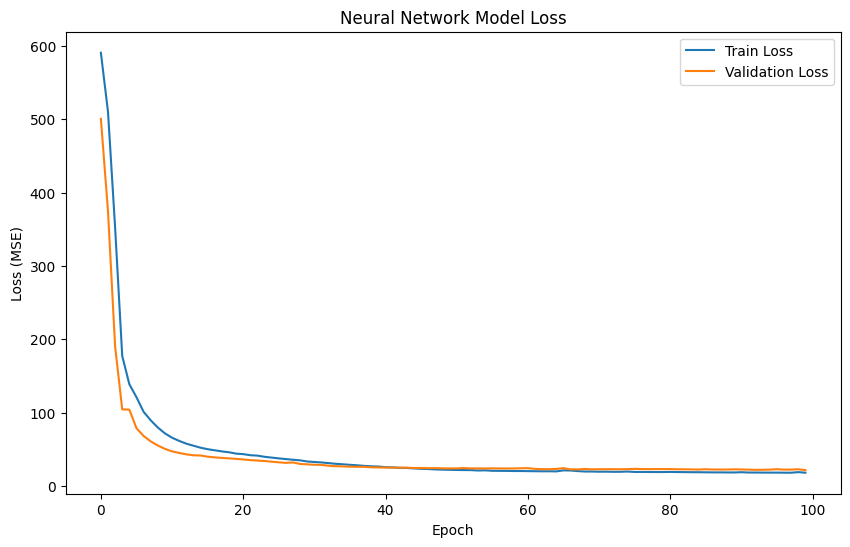

In [15]:
history = model_nn.fit(X_train_scaled_df, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss = model_nn.evaluate(X_test_scaled_df, y_test, verbose=0)
print(f"Neural Network Test Loss (MSE): {loss}")

# Make predictions
y_pred_nn = model_nn.predict(X_test_scaled_df)

# Calculate R-squared for the NN model
# Note: Keras doesn't directly provide an R-squared metric during evaluation,
# so we calculate it manually.
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network Test R-squared: {r2_nn}")

# Plot training history (optional)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()